In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import plotly.express as px

In [26]:
web_content = requests.get('https://www.mohfw.gov.in/').text

In [27]:
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5: 
        stats.append(stat)

#now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)


state_data

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,33,33,0
1,2,Andhra Pradesh,2647,1709,53
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,203,54,4
4,5,Bihar,1982,593,11
5,6,Chandigarh,217,139,3
6,7,Chhattisgarh,128,59,0
7,8,Dadar Nagar Haveli,1,0,0
8,9,Delhi,11659,5567,194
9,10,Goa,52,7,0


In [28]:
state_data.drop(state_data.tail(2).index,inplace=True)
state_data['Deceased'][24]=0

In [29]:
state_data['lat']=[11.7401,15.9129,28.2180,26.244156,25.0961,30.7333,21.295132,20.1809,28.7041,15.2993,22.309425,29.065773,32.084206,33.7782,23.6102,15.317277,10.850516,34.209515,23.473324,19.663280,24.6637,25.4670,23.1645,20.940920,11.9416,31.1471,27.0238,11.1271,18.1124,23.9408,30.0668,26.8467,22.9868]
state_data['lon']=[92.6586,79.7400,94.7278,92.537842,85.3131,76.7794,81.828232,73.0169,77.1025,74.1240,72.136230,76.040497,77.571167,76.5762,85.2799,75.713890,76.271080,77.615112,77.947998,75.300293,93.9063,91.3662,92.9376,84.803467,79.8083,75.3412,74.2179,78.6569,79.0193,91.9882,79.0193,80.9462,87.8550]

In [30]:
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased'] = state_data['Deceased'].map(int)

In [31]:
state_data.style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

,Sr.No,States/UT,Confirmed,Recovered,Deceased,lat,lon
0,1,Andaman and Nicobar Islands,33,33,0,11.740100,92.658600
1,2,Andhra Pradesh,2647,1709,53,15.912900,79.740000
2,3,Arunachal Pradesh,1,1,0,28.218000,94.727800
3,4,Assam,203,54,4,26.244156,92.537842
4,5,Bihar,1982,593,11,25.096100,85.313100
5,6,Chandigarh,217,139,3,30.733300,76.779400
6,7,Chhattisgarh,128,59,0,21.295132,81.828232
7,8,Dadar Nagar Haveli,1,0,0,20.180900,73.016900
8,9,Delhi,11659,5567,194,28.704100,77.102500
9,10,Goa,52,7,0,15.299300,74.124000


# Geographical analysis

In [32]:
fig = px.scatter_mapbox(state_data,lat="lat", lon="lon", hover_name="States/UT", hover_data=["Confirmed",'Recovered','Deceased'],
                            color_discrete_sequence=["firebrick"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# State wise confirmed cases in india

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 <a list of 10 Text xticklabel objects>)

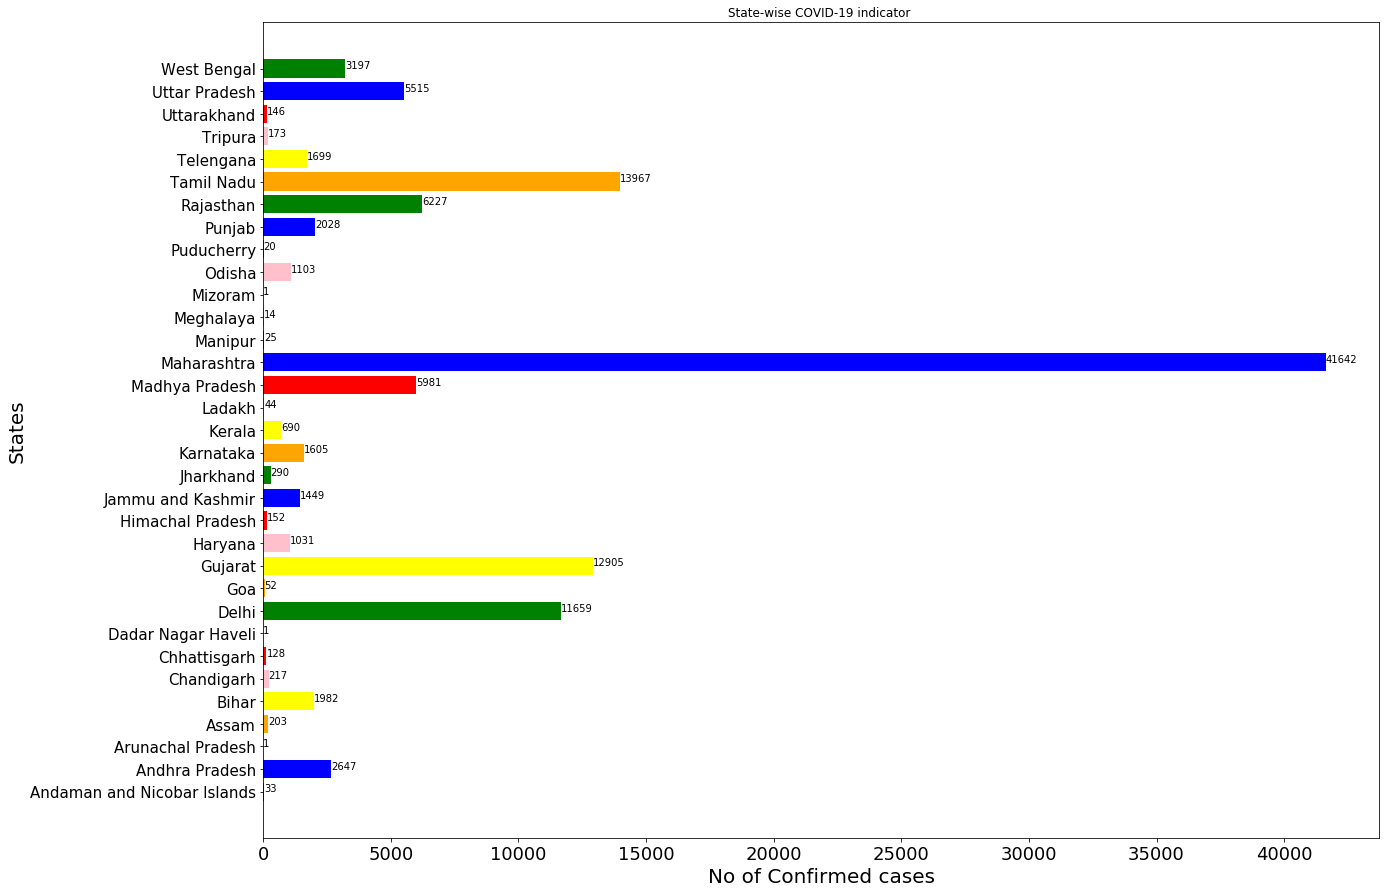

In [33]:
plt.figure(figsize=(20,15))
plt.barh(state_data['States/UT'],state_data['Confirmed'],color=['red','blue','green','orange','yellow','pink'])
for index, value in enumerate(state_data['Confirmed']):
    plt.text(value, index, str(value))
plt.title('State-wise COVID-19 indicator ')  
plt.xlabel('No of Confirmed cases',fontsize=20)
plt.ylabel('States',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=18)

Text(0.5, 1.0, 'Nationwide total Confirmed, Recovered and Deceased Cases')

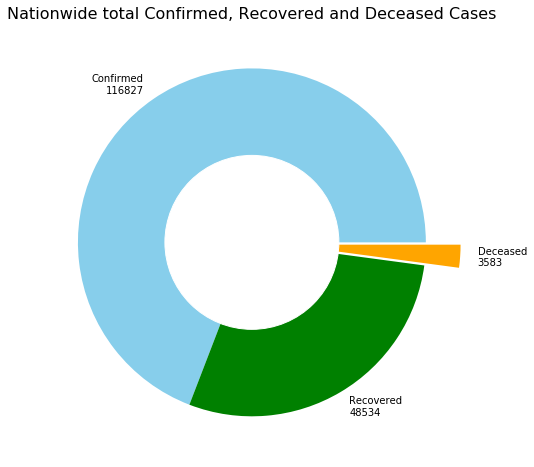

In [34]:
plt.figure(figsize=(8,8))
size = [sum(state_data['Confirmed']),sum(state_data['Recovered']),sum(state_data['Deceased'])]
labels = ['Confirmed\n'+str(sum(state_data['Confirmed'])),
          'Recovered\n'+str(sum(state_data['Recovered'])),
          'Deceased\n'+str(sum(state_data['Deceased']))]
colors = ['skyblue','green','orange']
explode = [0,0,0.2]
plt.pie(size,labels=labels,colors=colors,explode=explode)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
#Add an Artist to the axes, and return the artist.
fig.gca().add_artist(central_circle)
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)